# Timecard Traffic (Web Request Count) Weekly Prediction
### Using Holt-Winters (Triple Exponential Smoothing - TES) - Python

In [52]:
import numpy as np
import pandas as pd

In [53]:
df = pd.read_csv("Timecard-OCTNOV-2019.csv",sep=';',index_col='Timestamp', parse_dates=True)

In [54]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1385 entries, 2019-10-01 00:30:00 to 2019-11-27 23:30:00
Data columns (total 2 columns):
WebRequestCount    1385 non-null float64
Unnamed: 2         0 non-null float64
dtypes: float64(2)
memory usage: 32.5 KB


In [55]:
del df['Unnamed: 2']
df.head()

,WebRequestCount
Timestamp,
2019-10-01 00:30:00,42574.0
2019-10-01 01:30:00,42973.0
2019-10-01 02:30:00,17696.0
2019-10-01 03:30:00,391.0
2019-10-01 04:30:00,529.0


In [56]:
df.index

DatetimeIndex(['2019-10-01 00:30:00', '2019-10-01 01:30:00',
               '2019-10-01 02:30:00', '2019-10-01 03:30:00',
               '2019-10-01 04:30:00', '2019-10-01 05:30:00',
               '2019-10-01 06:30:00', '2019-10-01 07:30:00',
               '2019-10-01 08:30:00', '2019-10-01 09:30:00',
               ...
               '2019-11-27 14:30:00', '2019-11-27 15:30:00',
               '2019-11-27 16:30:00', '2019-11-27 17:30:00',
               '2019-11-27 18:30:00', '2019-11-27 19:30:00',
               '2019-11-27 20:30:00', '2019-11-27 21:30:00',
               '2019-11-27 22:30:00', '2019-11-27 23:30:00'],
              dtype='datetime64[ns]', name='Timestamp', length=1385, freq=None)

In [57]:
df = df.asfreq('1H')
df.index
df = df.resample('D').sum().fillna(0) # B for business day
df.head()

,WebRequestCount
Timestamp,
2019-10-01,842359.0
2019-10-02,121783.0
2019-10-03,640026.0
2019-10-04,420286.0
2019-10-05,26790.0


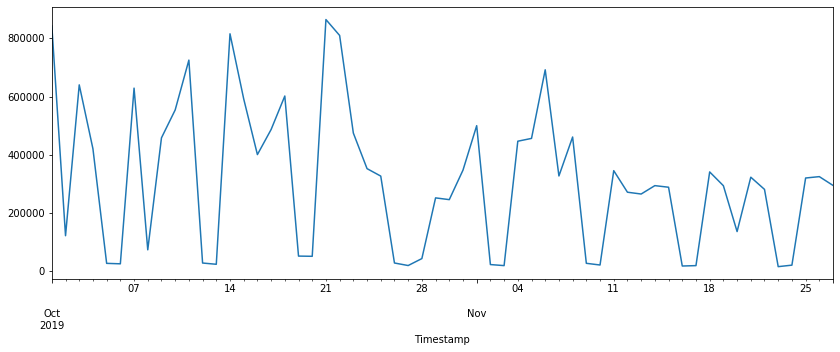

In [58]:
import matplotlib
%matplotlib inline
#df['WebRequestCount']['2019-11-20 00:30:00':].plot(figsize=(14,5))
df['WebRequestCount'].plot(figsize=(14,5))

In [59]:
# from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:

#df.WebRequestCount.interpolate(inplace=True)
#result = seasonal_decompose(df.WebRequestCount, model='mul')

#result.plot();

In [61]:
df.head()
df.info()

#df.WebRequestCount.interpolate(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2019-10-01 to 2019-11-27
Freq: D
Data columns (total 1 columns):
WebRequestCount    58 non-null float64
dtypes: float64(1)
memory usage: 928.0 bytes
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58 entries, 2019-10-01 to 2019-11-27
Freq: D
Data columns (total 1 columns):
WebRequestCount    58 non-null float64
dtypes: float64(1)
memory usage: 928.0 bytes


#### Train vs Test Splitting
`Total days data` is 58 Days (1392 Samples)
80% data is for train, 20% data for test

That is, 46\*24 Samples for train and (58-46)\*24 Samples for test

That is 1104-> Train and 288 --> Test

In [62]:
train_data = df.iloc[:44] # excluding 1104: Indexing rule for slicing
test_data = df.iloc[44:58]

#### Fit the data

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [64]:
model_type='add' #'add' or 'mul'
fitted_model=ExponentialSmoothing(train_data['WebRequestCount'],trend=model_type,seasonal=model_type,seasonal_periods=7).fit()

In [65]:
# NUMBER OF PERIDOS TO PREDICT FOR

test_prediction = fitted_model.forecast(14)

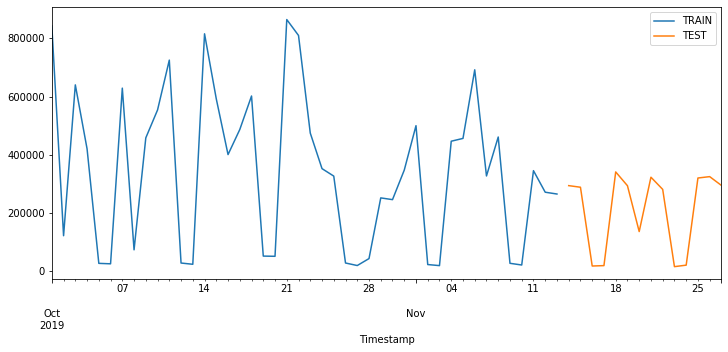

In [66]:
train_data['WebRequestCount'].plot(legend=True,label='TRAIN',figsize=(12,5))
test_data['WebRequestCount'].plot(legend=True,label='TEST')

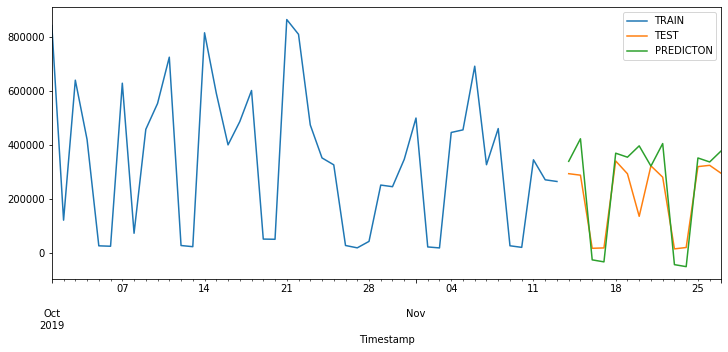

In [67]:
train_data['WebRequestCount'].plot(legend=True,label='TRAIN',figsize=(12,5))
test_data['WebRequestCount'].plot(legend=True,label='TEST')
test_prediction.plot(legend=True,label='PREDICTON')

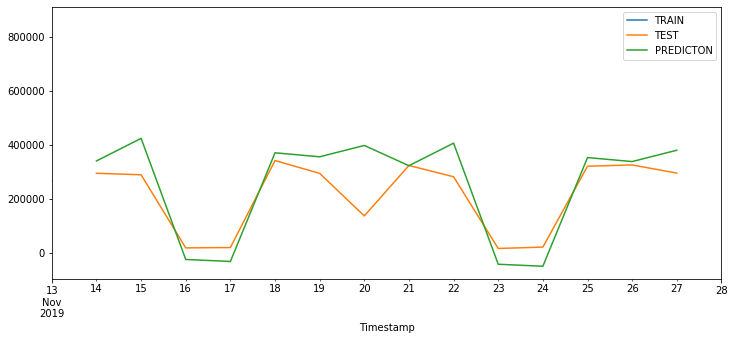

In [68]:
train_data['WebRequestCount'].plot(legend=True,label='TRAIN',figsize=(12,5))
test_data['WebRequestCount'].plot(legend=True,label='TEST')
test_prediction.plot(legend=True,label='PREDICTON',xlim=['2019-11-13','2019-11-28'])

#### from sklearn.metrics import mean_absolute_error, mean_squared_error

In [79]:
# Mean ABS ERROR (MAE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(test_data,test_prediction)

72122.57764004664

In [80]:
# MSE : Mean Squared Error
mean_squared_error(test_data,test_prediction)
# ROOT MSE : RMSE
rmse = np.sqrt(mean_squared_error(test_data,test_prediction))
rmse

96235.99497354902

In [71]:
test_data.describe()

,WebRequestCount
count,14.000000
mean,212038.642857
std,135891.448878
min,15488.000000
25%,49464.500000
50%,290950.500000
75%,313654.000000
max,340923.000000


### How is the model performing?

Since the rmse < Standard deviation of the series, this is ok. 

`std = 135k`

`mean = 212k`


`mean_abs_error=72k`

`rmse = 96k`

# FORECAST IN FUTURE : 2 Weeks from 27th Nov

In [72]:
final_model = ExponentialSmoothing(df['WebRequestCount'],trend='mul',seasonal='mul',seasonal_periods=7).fit()

In [73]:
forecast_prediction = final_model.forecast(14)

### Orange Line is the weekly forecast based on the TES Forecaster

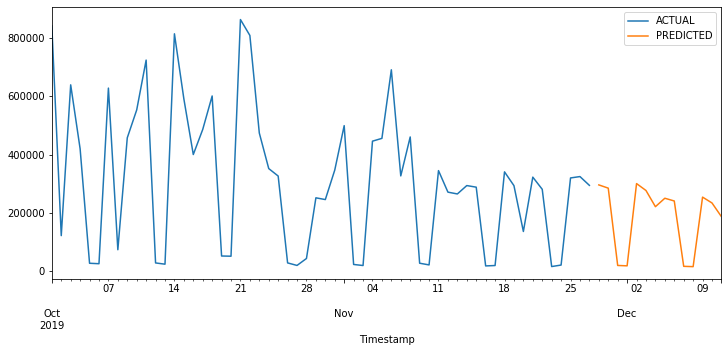

In [74]:
df['WebRequestCount'].plot(figsize=(12,5),legend=True,label='ACTUAL')
forecast_prediction.plot(legend=True,label='PREDICTED')

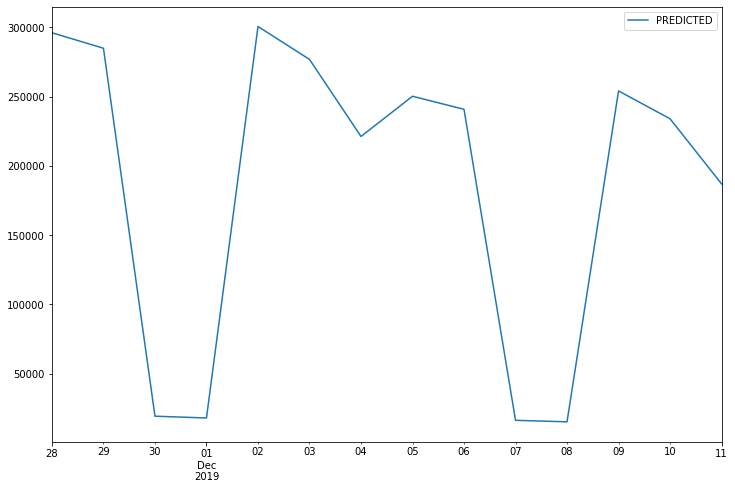

In [75]:
forecast_prediction.plot(legend=True,label='PREDICTED', figsize=(12,8))

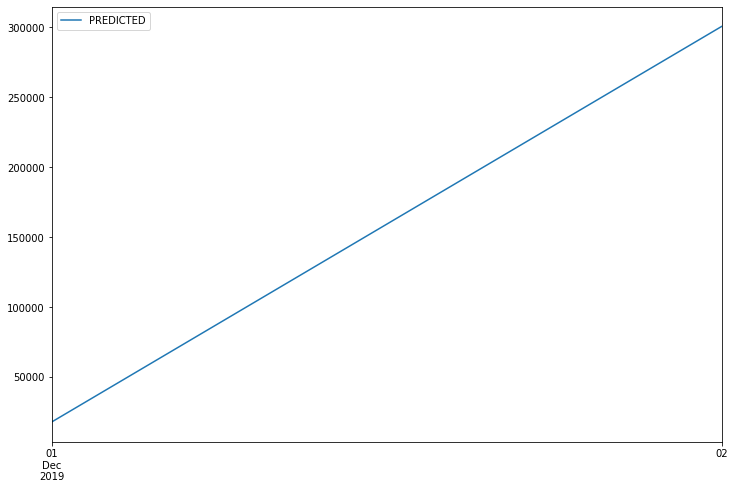

In [76]:
forecast_prediction['2019-12-01':'2019-12-02'].plot(legend=True,label='PREDICTED', figsize=(12,8))

In [81]:
forecast_prediction['2019-11-27':'2019-12-03']

2019-11-28    296133.043159
2019-11-29    284969.609391
2019-11-30     19232.822502
2019-12-01     17934.158822
2019-12-02    300675.951256
2019-12-03    276905.536816
Freq: D, dtype: float64